[UCI ML Datasets](https://archive.ics.uci.edu/ml/datasets.php) \
[IRIS Dataset](https://archive.ics.uci.edu/ml/datasets/iris)

**Data Set Characteristics:**

Multivariate *#significa che ci sono più di due classi*


**Attribute Characteristics:**

Real *#tipologia di numeri* (in questo caso REALI)


---


La cosa che ci interessa di più è:\
**Attribute Information**:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
* Iris Setosa
* Iris Versicolour
* Iris Virginica

Per vedere i dati andare in:\
--Data Folder, file.data (file binario)


#Importo l'immagine

In [1]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png')

#Importo i dati

In [9]:
import pandas as pd
import numpy as np

path= 'iris.data'

df = pd.read_csv(path, header=None) #gli devo dire che non c'è l'header (intestazione) con l'argomento header=None

In [10]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.columns = ['sepal lenght', 'sepal width', 'petal lenght', 'petal width', 'class'] #assegno una lista di valori alle colonne del df

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal lenght  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal lenght  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal lenght,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal lenght,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


#Inizio dell'EDA

#Problema bilanciato/sbilanciato

Il problema è bilanciato/sbilanciato?
* Quando affrontiamo un problema di classificazione, devo accertarmi che il numero di classi sia equo e non troppo omogeneo , ovvero che la conta per ogni classe sia simile

In [16]:
df.groupby('class').count() 

,sepal lenght,sepal width,petal lenght,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


Se non ho abbastanza conta nelle classi utilizzo i metodi di SMOTE metodi di over sampling

#Seaborn

##pairplot

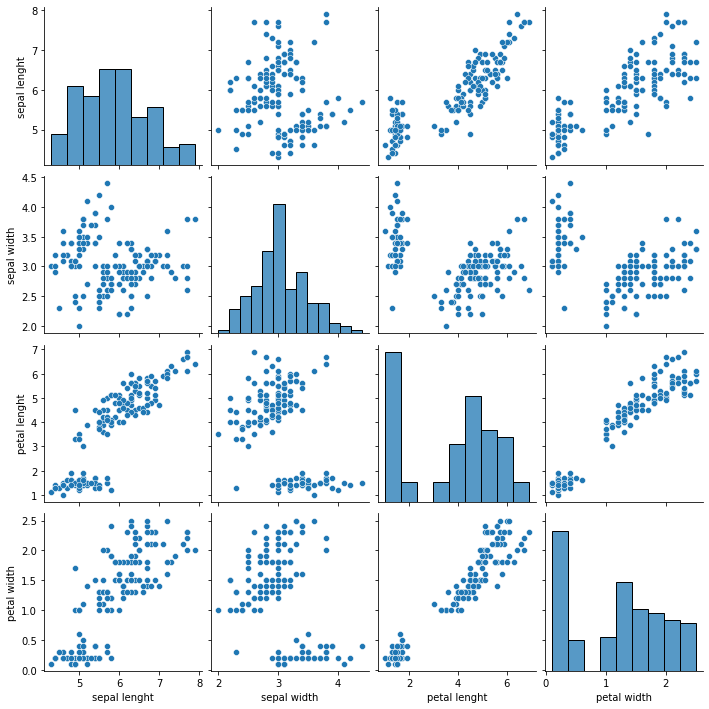

In [17]:
import seaborn as sns

sns.pairplot(df) #Questa matrice di plot è simmetrica, se guardo sotto ho la stessa rappresentazione al contrario di sopra, nella diagonale principale ho la frequenza ovvero la distribuzione reale di ogni grandezza ovvero delle features, ci fa vedere la correlazione delle variabili

Dobbiamo capire se esistono delle combinazioni di features che mi permettono a priori di dividere i data point nelle diverse classi

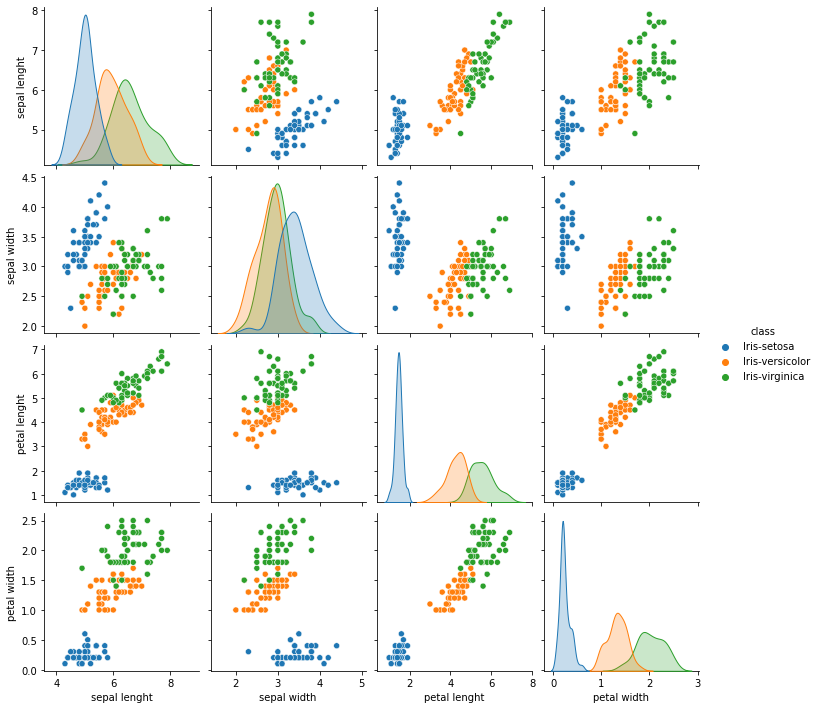

In [18]:
sns.pairplot(df, hue='class')

Più variabilità: ho meno valori tutti uguali, in un range min-max più ampio 

\
Posso creare data una variabile continua delle variabili categoriche

#Plotting

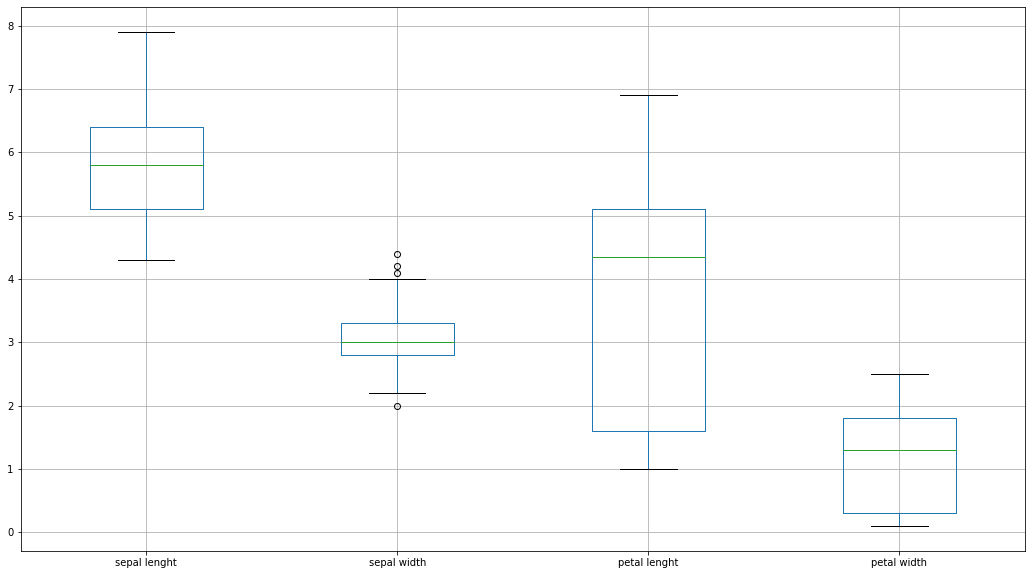

In [20]:
df.boxplot(figsize=(18,10))

Outlier: tutti i data point che sono più distanti di 3 punti dalla deviazione standard. In verde vedo la mediana.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8112ec1bd0>,
      dtype=object)

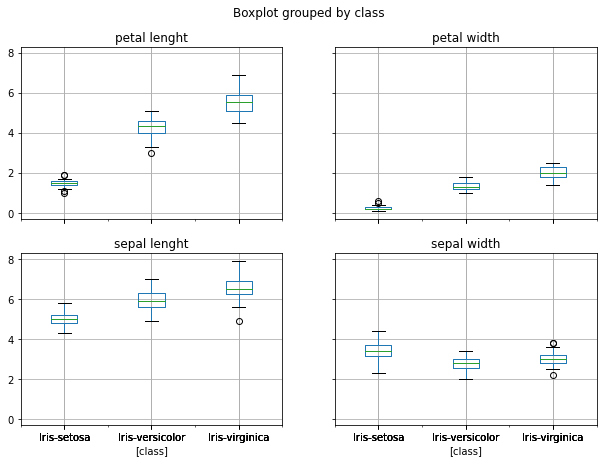

In [24]:
df.boxplot(by='class', figsize=(10,7)) #Features per classe

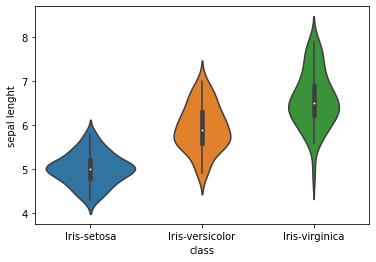

In [21]:
sns.violinplot(x='class', y='sepal lenght', data=df)

In [26]:
import matplotlib.pyplot as plt

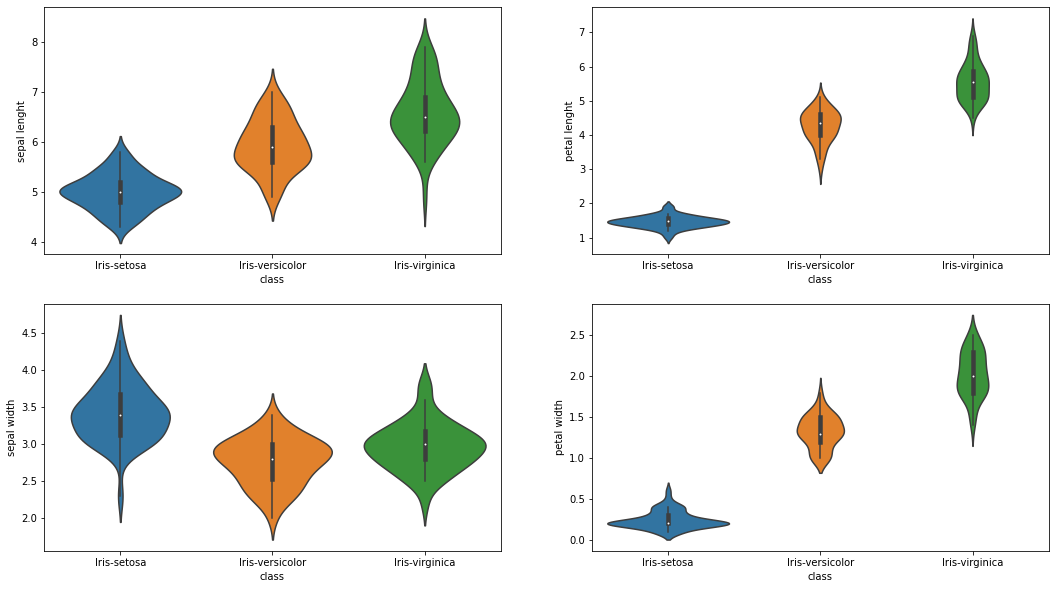

In [27]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x='class', y='sepal lenght', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='class', y='petal lenght', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='class', y='sepal width', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='class', y='petal width', data=df)

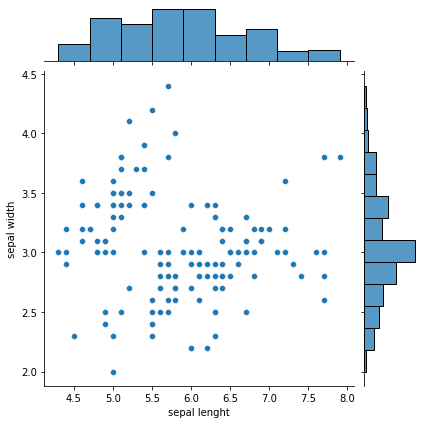

In [29]:
sns.jointplot(x='sepal lenght', y='sepal width',data = df) #se volessi  fare uno studio su un incrocio particolare

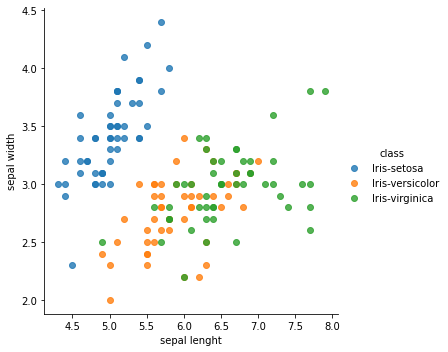

In [30]:
sns.lmplot(x='sepal lenght', y='sepal width',hue = 'class', data = df, fit_reg=False); 

In [31]:
from pandas.plotting import parallel_coordinates

Vado a rappresentare ogni riga del df per feature

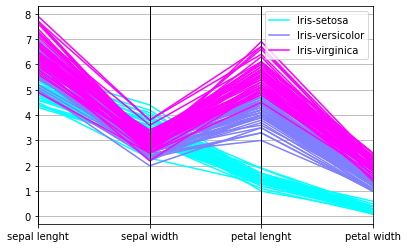

In [33]:
parallel_coordinates(df, 'class', colormap='cool')

#FIT

Che cos'è la regressione? 



---

La regressione è una semplificazione di un problema: ho una distribuzione di punti e cerco di descriverla con la retta.

---

\
Date due o più variabili, cerco con una funzione mono o multi dimensionale di descrivere la distribuzione dei dati.

---

\
Il modello genera in maniera random una retta, e poi fa la "calibrazione", **minimizza le distanze dei punti dalla retta**.
\
Crea n fasci di rette e fa il rank di quale retta è migliore.
\
Però essendo lineare non riesce a descrivere troppo bene se ho ad esempio i punti "a parabola".
\
Funziona bene quando i data point hanno distribuzioni lineari. Quando ho delle distribuzioni quadratiche molto complesse la regressione non ha buone performance.
\
Il valore è che una volta che abbiamo la retta possiamo implementarla anche su Excel.

La differenza con i problemi di classificazione è che non è un problema di tipo continuo, dati degli input mi devi dare un output

Problema di regressione logistica. 

Va da 0 a 1 (treshold 0.5 che sopra è classe 1, sotto classe 0), ed indica da 0% a 100% la percentuale di quanto può essere quella classe.

#Logistic Model

Importo logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

Cancello i target dalla mia asse x

In [41]:
X= df.drop('class', axis=1) #cancello la colonna classi
X

,sepal lenght,sepal width,petal lenght,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Imposto la mia asse Y come target quindi classi

In [39]:
y = df['class']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

##Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=667)

In [43]:
model.fit(X_train, y_train)

LogisticRegression()